# Detector Efficiency Comparison

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.visualization import quantity_support
from sunpy.io.special import read_genx

from mocksipipeline.detector.response import SpectrogramChannel, ThinFilmFilter

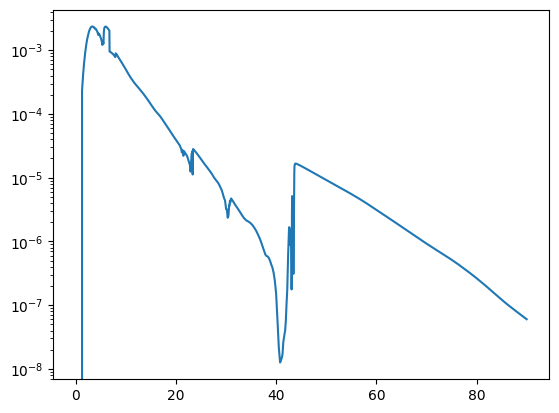

In [22]:
plt.plot(channel.wavelength, channel.wavelength_response)
#plt.xlim(0,20)
plt.yscale('log')

In [2]:
channel = SpectrogramChannel(1)
original_data = channel._read_genx_instrument_data('MOXSI_S1')

In [3]:
wavelength = np.arange(1,1000,0.1) * u.AA
energy = wavelength.to('eV', equivalencies=u.equivalencies.spectral())

In [4]:
energy

<Quantity [12398.41984332, 11271.29076665, 10332.0165361 , ...,
              12.40214049,    12.40090002,    12.39965981] eV>

In [5]:
si_10 = ThinFilmFilter('Si', thickness=10*u.micron, xrt_table='Henke')
si_33 = ThinFilmFilter('Si', thickness=33*u.micron, xrt_table='Henke')
sio2 = ThinFilmFilter(['Si', 'O'], thickness=50*u.AA, quantities=[1,2], xrt_table='Chantler total')

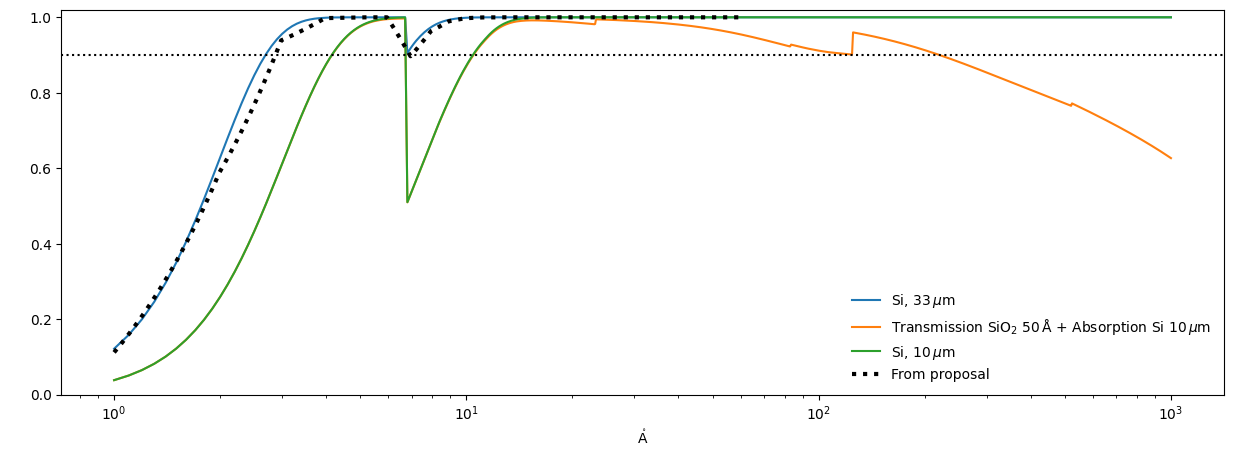

In [14]:
plt.figure(figsize=(15,5))
with quantity_support():
    plt.plot(wavelength, 1-si_33.transmissivity(energy), label=r'Si, $33\,\mu$m')
    plt.plot(wavelength,
             sio2.transmissivity(energy)*(1-si_10.transmissivity(energy)),
             label=r'Transmission SiO$_2$ $50\,\mathrm{\AA}$ + Absorption Si $10\,\mu$m')
    plt.plot(wavelength, 1-si_10.transmissivity(energy), label=r'Si, $10\,\mu$m')

plt.plot(original_data['wave'], original_data['det'],
         label='From proposal', color='k', ls=':', lw=3)
plt.legend(frameon=False)
#plt.xlim(0,55)
plt.ylim(0,1.02)
plt.axhline(y=0.9, ls=':', color='k')
plt.xscale('log')